In [1]:
import pandas as pd

In [2]:
dc=pd.read_csv("Salary")
dc

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
dc.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# About the columns :

1. Rank : This column tells us about the ranks of the employees whose salary is to be predicted.


2. Discipline : This column tells us about the discipline in terms of grades.


3. yrs. since.phd. : This column tells us the no. of years after one has completed the phd.


4. yrs. service : This column tells us about the no. of years of service of each employee.


5. sex : This column tells us about the gender of the employees.


6. Salary : This column is indicating the salary of each employee.

In [4]:
dc.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [5]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [6]:
dc.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
import seaborn as sns

# EDA

In [8]:
dc.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

all the features are positively skewed.

<AxesSubplot:xlabel='salary', ylabel='discipline'>

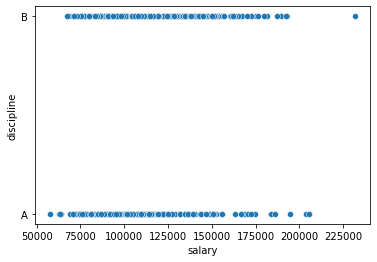

In [9]:
sns.scatterplot(x="salary",y="discipline",data=dc)

It shows disciplines are not that impacting the salaries of the employees since the both A and B disciplines have the maximum salary around 2 lacs. only few from Disciplines A have salary above that.

<AxesSubplot:xlabel='salary', ylabel='rank'>

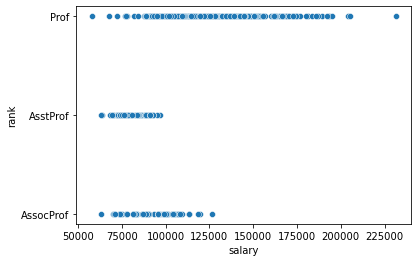

In [10]:
sns.scatterplot(x="salary",y="rank",data=dc)

The above scatterplot shows that as the rank increases salaries also increase. A Professor is getting more salary at some point than an Assistant professor and Associate Professor.

<AxesSubplot:xlabel='salary', ylabel='yrs.since.phd'>

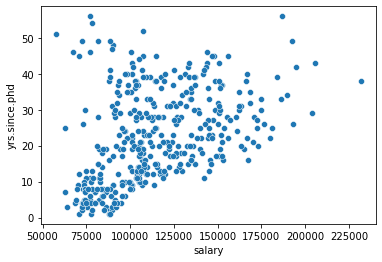

In [11]:
sns.scatterplot(x="salary",y="yrs.since.phd",data=dc)

The relationship between salaries and Yrs. since Phd. is weak positive, there are roughly more salaries when one is having around 30 years since he has done Phd.

<AxesSubplot:xlabel='salary', ylabel='yrs.service'>

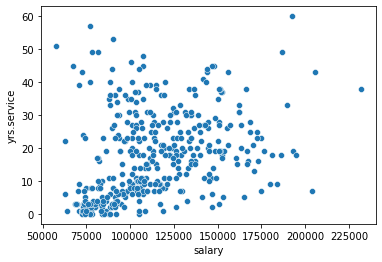

In [12]:
sns.scatterplot(x="salary",y="yrs.service",data=dc)

The relationship between salaries and Yrs. of service as per the above plot says that more employees are having maximum salaries if they have around 20-25 years of experience 

<AxesSubplot:xlabel='salary', ylabel='sex'>

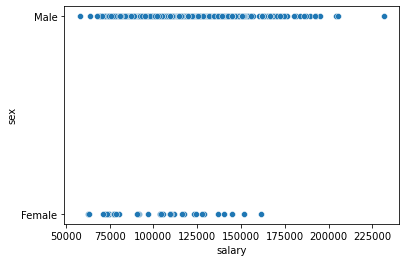

In [13]:
sns.scatterplot(x="salary",y="sex",data=dc)

The above graph clearly depicts that there are more no. of males with higher salaries compared to females.

# Correlation :

<AxesSubplot:>

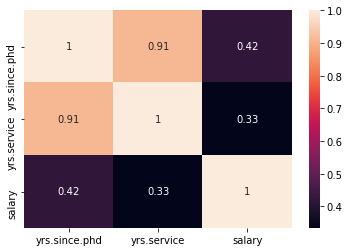

In [14]:
sns.heatmap(dc.corr(),annot=True)

yrs. service is negatively correlated as per the above plot. Looking at the skewness , contribution, no. of columns , we will not be dropping any column since the no. is less, hence we will end up loosing our dataset

# Finding and Removing Outliers :

yrs.since.phd       AxesSubplot(0.125,0.536818;0.133621x0.343182)
yrs.service      AxesSubplot(0.285345,0.536818;0.133621x0.343182)
salary            AxesSubplot(0.44569,0.536818;0.133621x0.343182)
dtype: object

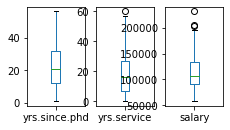

In [15]:
dc.plot(kind="box", subplots=True, layout=(2,5))

# Using label encoder to encode string values:

In [16]:
from sklearn.preprocessing import LabelEncoder
lencode=LabelEncoder()
dc["rank"]=lencode.fit_transform(dc["rank"])
dc

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,B,19,18,Male,139750
1,2,B,20,16,Male,173200
2,1,B,4,3,Male,79750
3,2,B,45,39,Male,115000
4,2,B,40,41,Male,141500
...,...,...,...,...,...,...
392,2,A,33,30,Male,103106
393,2,A,31,19,Male,150564
394,2,A,42,25,Male,101738
395,2,A,25,15,Male,95329


In [17]:
dc["discipline"]=lencode.fit_transform(dc["discipline"])
dc

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,Male,139750
1,2,1,20,16,Male,173200
2,1,1,4,3,Male,79750
3,2,1,45,39,Male,115000
4,2,1,40,41,Male,141500
...,...,...,...,...,...,...
392,2,0,33,30,Male,103106
393,2,0,31,19,Male,150564
394,2,0,42,25,Male,101738
395,2,0,25,15,Male,95329


In [18]:
dc["sex"]=lencode.fit_transform(dc["sex"])
dc

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [19]:
import numpy as np

from scipy.stats import zscore

z=np.abs(zscore(dc))

dc_new=dc[(z<3).all(axis=1)]

dc_new


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


# Linear Regression:

In [20]:
#importing required libraries
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [21]:
x = dc_new.iloc[:,0:5]

In [22]:
y= dc_new.iloc[:,-1]

In [23]:
x.shape

(354, 5)

In [24]:
y.shape

(354,)

# Standard Scaling:

In [25]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()  #standardizes features by removing the mean and scaling to unit variance
x=scale.fit_transform(x)
x

array([[ 0.62257137,  0.9133438 , -0.28695003,  0.00617053,  0.        ],
       [ 0.62257137,  0.9133438 , -0.20899123, -0.14985577,  0.        ],
       [-0.72127171,  0.9133438 , -1.45633194, -1.16402677,  0.        ],
       ...,
       [ 0.62257137, -1.09487797,  1.50610224,  0.55226261,  0.        ],
       [ 0.62257137, -1.09487797,  0.18080274, -0.22786893,  0.        ],
       [-0.72127171, -1.09487797, -1.14449676, -1.08601362,  0.        ]])

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=33,random_state=42)

In [27]:
x_train.shape

(321, 5)

In [28]:
y_train.shape

(321,)

In [29]:
x_test.shape

(33, 5)

In [30]:
y_test.shape

(33,)

In [31]:
lm=LinearRegression()

In [32]:
lm.fit(x_train,y_train)

LinearRegression()

In [33]:
lm.coef_

array([ 12274.88790634,   7143.97478829,  16800.13700304, -11744.02998958,
            0.        ])

In [34]:
dc_new.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [35]:
lm.score(x_train,y_train)

0.35929813397014443

In [36]:
pred=lm.predict(x_test) 
print("Predicted salary:", pred)
print("Actual salary:", y_test)

Predicted salary: [119539.43654071 126040.093321    85571.98435816 130627.17821941
 132840.80378967  89682.32910557 121582.138015   132459.55584554
  99706.32987952 115628.70376983 103764.6147421   89507.28046143
 123868.2622543  125505.15245207  78690.07963373 113525.78529269
 108545.17078395  87010.83237396 114964.63330849 121053.33797916
 125646.56371067  86798.49224088 119035.19983726 140317.86638588
  85178.45474783 103635.48514969 110764.9371873  108932.55956118
 112932.64370583 121840.39719982 120062.09574344  90417.32844139
 116797.01093461]
Actual salary: 251    102000
50     126621
321     95642
206    162200
66     101000
306     74500
16     101000
67      99418
163     89942
378    150680
95      84000
193     86250
393    150564
345    107986
140    100102
375    103649
225    122400
168    101210
381    172505
337    145000
147    156938
287     85000
270    143250
38     125196
182    100000
315     84716
311    108100
360    121946
28      77000
85     132825
239     9

In [37]:
print("error:")
print("Mean Absolute Error:", mean_absolute_error(y_test,pred))
print("Mean Squared Error:", mean_squared_error(y_test,pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean Absolute Error: 19505.91382128928
Mean Squared Error: 521550027.47060233
Root Mean Squared Error: 22837.469813238997


# Using another model on this dataset : Random Forest Classifier

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier as RFC
rfc_b = RFC()
rfc_b.fit(x_train,y_train)
y_pred = rfc_b.predict(x_train)
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:', accuracy_score(y_test,rfc_b.predict(x_test)))

Train accuracy score: 0.8442367601246106
Test accuracy score: 0.030303030303030304


This is not making a model work good. let's try another

# Ridge Model:

In [42]:
from sklearn.linear_model import Ridge
import numpy as np
ridge = Ridge()
ridge.fit(x_train,y_train)
y_prob = ridge.predict(x_train)
y_pred = np.asarray([np.argmax(line) for line in y_prob])
yp_test = ridge.predict(x_test)
test_preds = np.asarray([np.argmax(line) for line in yp_test])
print(accuracy_score(y_train,y_pred))
print(accuracy_score(y_test,test_preds))

0.0
0.0


In [ ]:
Again, above model is not a good model .

In [ ]:
K-neighbours Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_train)
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:',accuracy_score(y_test,knn.predict(x_test)))

Train accuracy score: 0.23052959501557632
Test accuracy score: 0.0
